In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(num_splits=10)

In [26]:
podcasts_segments = np.load('podcast_segmented.npy')
ads_segments = np.load('adBinary_segmented.npy')

X_train, X_test, y_train, y_test = train_test_split(np.array(podcasts_segments),
                                                    np.array(ads_segments),
                                                    test_size=0.33,
                                                    random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test, 
                                                test_size=0.5,
                                                random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train.shape)

(145949, 128, 10)
(35943, 128, 10)
(35943, 128, 10)
(145949, 128, 10, 1)


In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 10, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 8, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 4, 32)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 8064)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                516160    
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 516,545
Trainable params: 516,545
Non-trainable params: 0
________________________________________________

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics='accuracy')
              
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))


Epoch 1/100
4561/4561 [==============================] - 32s 7ms/step - loss: 2.2137 - accuracy: 0.7383 - val_loss: 1.6572 - val_accuracy: 0.7527
Epoch 2/100
4561/4561 [==============================] - 34s 7ms/step - loss: 1.1490 - accuracy: 0.8240 - val_loss: 1.0108 - val_accuracy: 0.8365
Epoch 3/100
4561/4561 [==============================] - 33s 7ms/step - loss: 0.9643 - accuracy: 0.8494 - val_loss: 0.9495 - val_accuracy: 0.8539
Epoch 4/100
4561/4561 [==============================] - 34s 7ms/step - loss: 0.8906 - accuracy: 0.8610 - val_loss: 0.8744 - val_accuracy: 0.8616
Epoch 5/100
4561/4561 [==============================] - 33s 7ms/step - loss: 0.8353 - accuracy: 0.8685 - val_loss: 0.8897 - val_accuracy: 0.8629
Epoch 6/100
4561/4561 [==============================] - 33s 7ms/step - loss: 0.8220 - accuracy: 0.8737 - val_loss: 0.9203 - val_accuracy: 0.8632
Epoch 7/100
4561/4561 [==============================] - 34s 7ms/step - loss: 0.7878 - accuracy: 0.8809 - val_loss: 0.8528 -

1124/1124 - 2s - loss: 0.8800 - accuracy: 0.9171 - 2s/epoch - 2ms/step


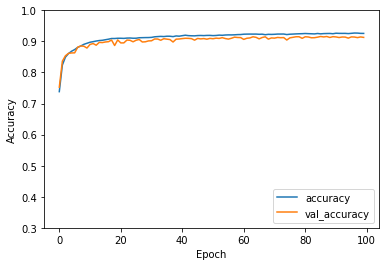

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)